# Classification based on encoding with Doc2Vec

### Doc2Vec Encoding:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

# Load data:
df = pd.read_csv("../data/sachkonto_positionstexte.csv")
X = df["Positionstext"]
S = { l[0] : l[1] for l in df[["Sachkonto", "Sachkontobeschreibung"]].drop_duplicates().values}
y = df["Sachkonto"]

# Target encoding:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Prepare text-data for Doc2Vec:
train_tagged = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(X)]

# Train Doc2Vec-Model:
d2v_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=40)
d2v_model.build_vocab(train_tagged)
d2v_model.train(train_tagged, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

# Map into Vectorspace:
X_vectors = np.array([d2v_model.infer_vector(doc.words) for doc in train_tagged])

# Train/Test-Split:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)




## Doc2Vec and XGBoost

In [ ]:
# Classifier: XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)


In [ ]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


In [ ]:
# Check:
y.unique()

array([400000, 440000, 480000, 481000, 490000, 500000, 510000, 520000,
       530000, 540000], dtype=int64)

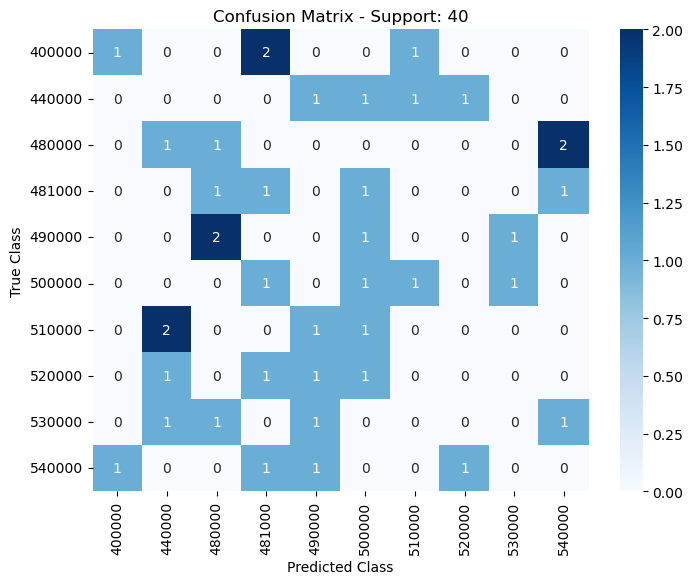

In [3]:
from utils import plot_confusion_matrix

tick_labels = y.unique()

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)

## Doc2Vec and Logistic Regression

In [5]:
# 7. Klassifikator: Logistic Regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# 8. Vorhersage
y_pred = clf.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# 9. Evaluation
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      400000       0.67      0.50      0.57         4
      440000       0.00      0.00      0.00         4
      480000       0.33      0.25      0.29         4
      481000       0.30      0.75      0.43         4
      490000       0.00      0.00      0.00         4
      500000       0.08      0.25      0.12         4
      510000       0.00      0.00      0.00         4
      520000       0.00      0.00      0.00         4
      530000       0.00      0.00      0.00         4
      540000       1.00      0.25      0.40         4

    accuracy                           0.20        40
   macro avg       0.24      0.20      0.18        40
weighted avg       0.24      0.20      0.18        40

Confusion Matrix:
[[2 0 0 1 0 1 0 0 0 0]
 [1 0 0 1 0 2 0 0 0 0]
 [0 1 1 1 0 0 0 1 0 0]
 [0 0 0 3 0 0 0 0 1 0]
 [0 0 1 0 0 2 1 0 0 0]
 [0 0 0 0 0 1 2 1 0 0]
 [0 1 0 0 0 2 0 0 1 0]
 [0 0 0 1 0 2 0 0 1 0]
 [0 0 1 1 0 2 0 

c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

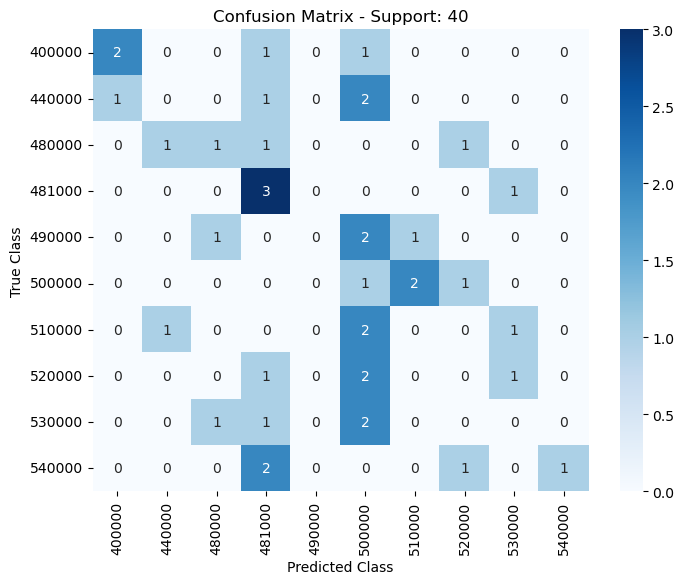

In [6]:
from utils import plot_confusion_matrix

tick_labels = y.unique()

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)